## Student Performance Analysis

### Step 1: Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Step 2: Load Dataset

In [15]:

csv1 = pd.read_csv(
    r'C:/Users/patel mayank/python learn/html/internship/task1/student (1)/student-mat.csv',
    sep=';'
)



### Step 3:Explore dataset


Initial exploration helps us understand:
- The number of rows and columns
- Data types of each column
- Presence of missing values

This step ensures the dataset is ready for analysis.


In [16]:
print("Shape of dataset:", csv1.shape)


Shape of dataset: (395, 33)


In [17]:
print("Data Types:\n", csv1.dtypes)


Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [18]:
print("Missing Values:\n", csv1.isnull().sum())

Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


### Step 4 :Data Cleaning


Data cleaning is performed to improve data quality.
- Duplicate records are identified
- Duplicate rows are removed to avoid biased results

The dataset contains no missing values.


In [19]:
print(" Duplicate rows before removal:", csv1.duplicated().sum())

csv1 = csv1.drop_duplicates()

print("Duplicate rows after removal:", csv1.duplicated().sum())
print("Dataset shape after cleaning:", csv1.shape)


 Duplicate rows before removal: 0
Duplicate rows after removal: 0
Dataset shape after cleaning: (395, 33)


### Step 5 :Analysis
- **Average Final Grade (G3)**: Measures overall student performance  
- **Students Scoring Above 15**: Identifies high-performing students  
- **Study Time vs Performance Correlation**: Shows relationship between effort and results  
- **Gender-wise Performance**: Compares average scores between male and female students

These metrics help in understanding academic trends and patterns.

In [20]:
avg_g3 = csv1['G3'].mean()

print(f"Average final grade (G3) is: {avg_g3:.2f}")

Average final grade (G3) is: 10.42


In [21]:
above_15 = (csv1['G3'] > 15).sum()
print(f"Number of students scoring above 15 is: {above_15}")

Number of students scoring above 15 is: 40


In [22]:


corr_value = csv1[['studytime', 'G3']].corr().iloc[0, 1]
print(f"Correlation between study time and performance is: {corr_value:.2f}")


Correlation between study time and performance is: 0.10


In [23]:

gender_avg = csv1.groupby('sex')['G3'].mean()

print("\nAverage Final Grade by Gender:")
print(gender_avg)

better_gender = gender_avg.idxmax()
better_score = gender_avg.max()

print(f"\nGender performing better on average: {better_gender} "
      f"with an average G3 score of {better_score:.2f}")



Average Final Grade by Gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

Gender performing better on average: M with an average G3 score of 10.91


### Step 6: Visualization

A histogram is used to visualize how final grades (G3) are distributed  
across all students. This helps identify common score ranges.

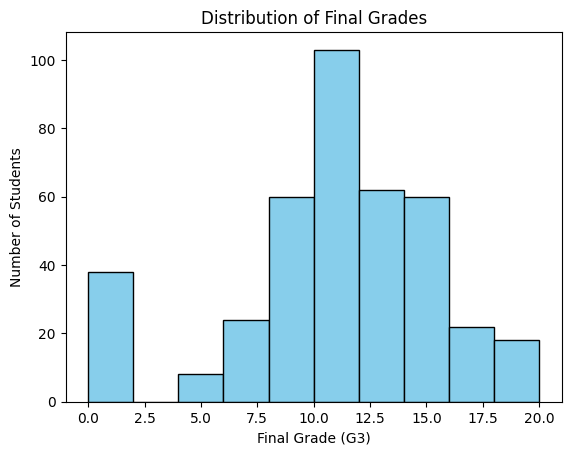

In [24]:

plt.figure()
plt.hist(csv1['G3'], color='skyblue', edgecolor='black')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades')
plt.show()



A scatter plot shows the relationship between study time and final grades. 
This helps determine whether increased study time leads to better performance.

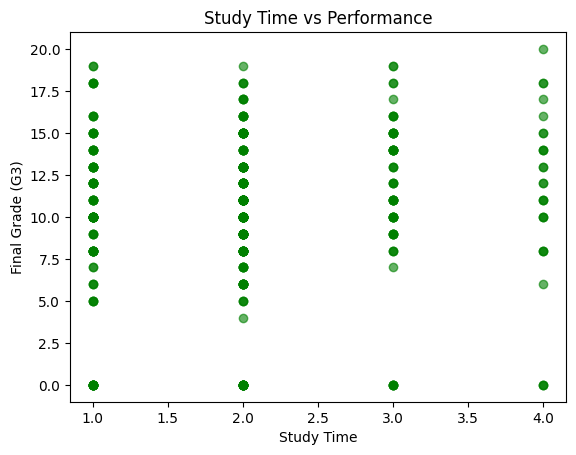

In [25]:

plt.figure()
plt.scatter(csv1['studytime'], csv1['G3'], alpha=0.6, color='green')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.title('Study Time vs Performance')
plt.show()



A bar chart compares the average final grade of male and female students.  
This visualization highlights performance differences between genders.

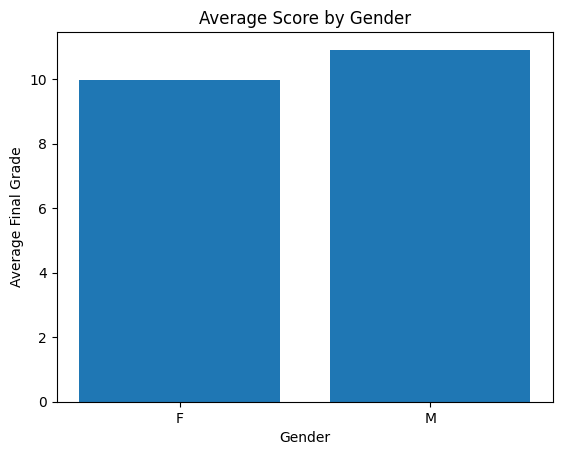

In [26]:
avg_gender = csv1.groupby('sex')['G3'].mean()

plt.figure()
plt.bar(avg_gender.index, avg_gender.values)
plt.xlabel('Gender')
plt.ylabel('Average Final Grade')
plt.title('Average Score by Gender')
plt.show()





### Conclusion

- The average final grade indicates moderate overall performance.
- A limited number of students scored above 15.
- Study time shows a weak positive correlation with performance.
- Female students perform slightly better on average than male students.

This analysis provides meaningful insights into student academic behavior.
